# Mixture Models and, specifically, Gaussian Mixture Models

* Thus far, we have primarily discussed relatively simple models consisting of only one peak in the probability distribution function (pdf) when representing data using pdfs.  
* For example, when we introduced the probabilistic generative classifier, our examples focused on representing each class using a single Gaussian distribution. 
* Consider the following data set, would a multivariate Gaussian be able to represent each of these clustering data set well? 

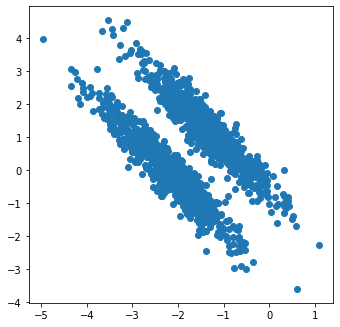

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline

n_samples = 1500
n_clusters = 2; 

#generate data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X, y = datasets.make_blobs(n_samples=n_samples , centers = n_clusters)
X = np.dot(X, transformation)

#Plot Results
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

* Would a single multivariate Gaussian be able to represent this data set well? 

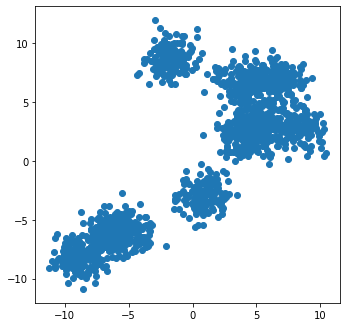

In [2]:
n_clusters = 10; 

#generate data
X, y = datasets.make_blobs(n_samples=n_samples , centers = n_clusters)

#Plot Results
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])

* The second data set would be better represented by a *mixture model* 
\begin{eqnarray}
p(x) = \sum_{k=1}^K \pi_k f(x | \theta_k)
\end{eqnarray}
   where $0 \le \pi_k \le 1$, $\sum_k \pi_k =1$


* If each $f(x | \theta_k)$ is assumed to be a Gaussian distribution, then the above mixture model would be a *Gaussian Mixture Model*
\begin{eqnarray}
p(x) = \sum_{k=1}^K \pi_k N(x | \mu_k, \Sigma_k)
\end{eqnarray}
   where $0 \le \pi_k \le 1$, $\sum_k \pi_k =1$

* *How would you draw samples from a Gaussian Mixture Model? from a mixture model in general?*

* Gaussian mixture models (GMMs) can be used to learn a complex distribution that represents a data set.  Thus, it can be used within the probabilistic generative classifier framework to model complex classes. 
* GMMs are also commonly used for clustering where a GMM is fit to a data set to be clustered and each estimated Gaussian component is a resulting cluster. 

* *If you were given a data set, how would you estimate the parameters of a GMM to fit the data?*
* A common approach for estimating the parameters of a GMM given data is *expectation maximization* (EM)

# Expectation Maximization


* EM is a general algorithm that can be applied to a variety of problems (not just mixture model clustering).

* With MLE, we define a likelihood and maximize it to find parameters of interest. 

* With MAP, we maximize the posterior to find parameters of interest. 

* The goal of EM is to also find the parameters that maximize your likelihood function. 

* *The 1st step* is to define your likelihood function (defines your objective)

* Originally introduced by Dempster, Laird, and Rubin in 1977 - ``Maximum Likelihood from Incomplete Data via the EM Algorithm``

* EM is a method to simplify difficult maximum likelihood problems.

* Suppose we observe $\mathbf{x}_1, \ldots, \mathbf{x}_N$ i.i.d. from $g(\mathbf{x}_i | \Theta)$

* We want: $\hat\Theta = argmax  L(\Theta|X) = argmax \prod_{i=1}^N g(\mathbf{x}_i | \Theta)$

* But suppose this maximization is very difficult.  EM simplifies it by expanding the problem to a bigger easier problem - ``demarginalization``

\begin{equation}
g(x|\Theta) = \int_z f(x, z | \Theta) dz
\end{equation}

Main Idea: Do all of your analysis on $f$ and then integrate over the unknown z's.  

### Censored Data Example
* Suppose we observe $\mathbf{y}_1, \ldots, \mathbf{y}_N$ i.i.d. from $f(\mathbf{y} | \Theta)$
* Lets say that we know that values are censored at $\ge a$
* So, we see: $\mathbf{y}_1, \ldots, \mathbf{y}_m$ (less than $a$) and we do not see $\mathbf{y}_{m+1}, \ldots, \mathbf{y}_N$  which are censored and set to $a$. 
* Given this censored data, suppose we want to estimate the mean if the data was uncensored. 
* Our observed data likelihood in this case would be: 
\begin{eqnarray}
L &=& \prod_{i=1}^m \left[ 1 - F(a |\theta)\right]^{N-m}f(\mathbf{y}_i | \theta)\\
&=& \prod_{i=1}^m f(\mathbf{y}_i | \theta) \prod_{j=m+1}^N \int_a^\infty f(\mathbf{y}_j | \theta) dy_j
\end{eqnarray}
where $F(\cdot)$ is the cumulative distribution function and $f(y|\theta) = N(y|\theta)$, for example. 

* So, the observed data likelihood would be very difficult to maximize to solve for $\theta$
* In EM, we introduce *latent variables* (i.e., ``hidden variables``) to simplify the problem
* *The second step*: Define the *complete likelihood* by introducing variables that simplify the problem. 

* Going back to the censored data example, if we had observed the missing data, the problem would be easy to solve! It would simplify to a standard MLE.  For this example, the complete data likelihood is: 
\begin{equation}
L^c = \prod_{i=1}^m f(y_i | \theta) \prod_{i=m+1}^N f(z_i | \theta)
\end{equation}
where $z_i$ are the latent, hidden variables. 
* Note: you cannot just use $a$ for the censored data, it would skew the results!
* The complete data likelihood would be much much simpler to optimize for $\theta$ if we had the $z$s... 
